# IMPORTS

In [54]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
import cv2
import extcolors

from colormap import rgb2hex

In [3]:
! ls ../images/WikiArt/Abstract-Art/57726e81edc2cb3880b74f34.jpg

../images/WikiArt/Abstract-Art/57726e81edc2cb3880b74f34.jpg


# Color Extraction for 1 image

In [4]:
input_name = '../images/WikiArt/Abstract-Art/57726e81edc2cb3880b74f34.jpg'

##### Resize

In [5]:
"""
input_name = '../images/WikiArt/Abstract-Art/57726e81edc2cb3880b74f34.jpg'
output_width = 900                   #set the output size
img = Image.open(input_name)
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS)

#save
resize_name = 'resize_' + input_name  #the resized image name
img.save(resize_name)                 #output location can be specified before resize_name

#read
plt.figure(figsize=(9, 9))
img_url = resize_name
img = plt.imread(img_url)
plt.imshow(img)
plt.axis('off')
plt.show()
"""

"\ninput_name = '../images/WikiArt/Abstract-Art/57726e81edc2cb3880b74f34.jpg'\noutput_width = 900                   #set the output size\nimg = Image.open(input_name)\nwpercent = (output_width/float(img.size[0]))\nhsize = int((float(img.size[1])*float(wpercent)))\nimg = img.resize((output_width,hsize), Image.ANTIALIAS)\n\n#save\nresize_name = 'resize_' + input_name  #the resized image name\nimg.save(resize_name)                 #output location can be specified before resize_name\n\n#read\nplt.figure(figsize=(9, 9))\nimg_url = resize_name\nimg = plt.imread(img_url)\nplt.imshow(img)\nplt.axis('off')\nplt.show()\n"

##### Extract Colors

In [6]:
colors_x = extcolors.extract_from_path("../images/WikiArt/Abstract-Art/57726e81edc2cb3880b74f34.jpg", tolerance = 24, limit = 10)
colors_x

([((108, 64, 27), 141264),
  ((5, 3, 4), 103070),
  ((164, 131, 54), 70498),
  ((181, 72, 15), 33571),
  ((88, 116, 117), 10432),
  ((198, 189, 150), 8043),
  ((50, 50, 12), 5558),
  ((47, 0, 0), 4689),
  ((137, 14, 16), 2910),
  ((167, 147, 146), 502)],
 381096)

In [7]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#6C401B,141264
1,#050304,103070
2,#A48336,70498
3,#B5480F,33571
4,#587475,10432
5,#C6BD96,8043
6,#32320C,5558
7,#2F0000,4689
8,#890E10,2910


##### Donut Chart

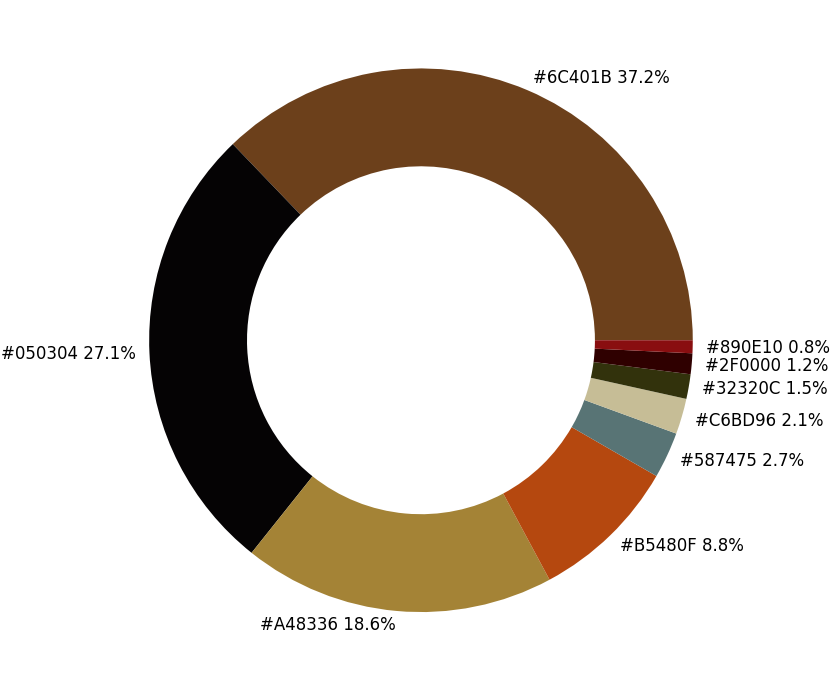

In [8]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

##### Table

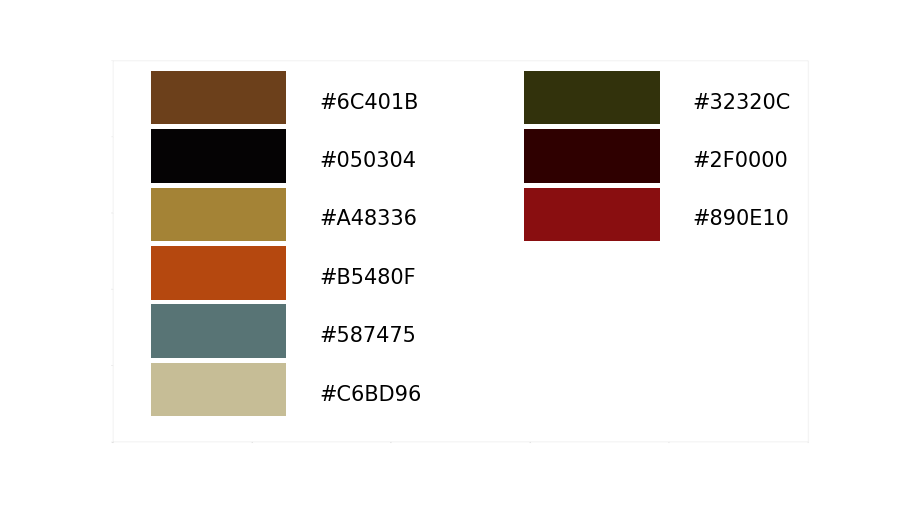

In [9]:

#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()

##### Final chart

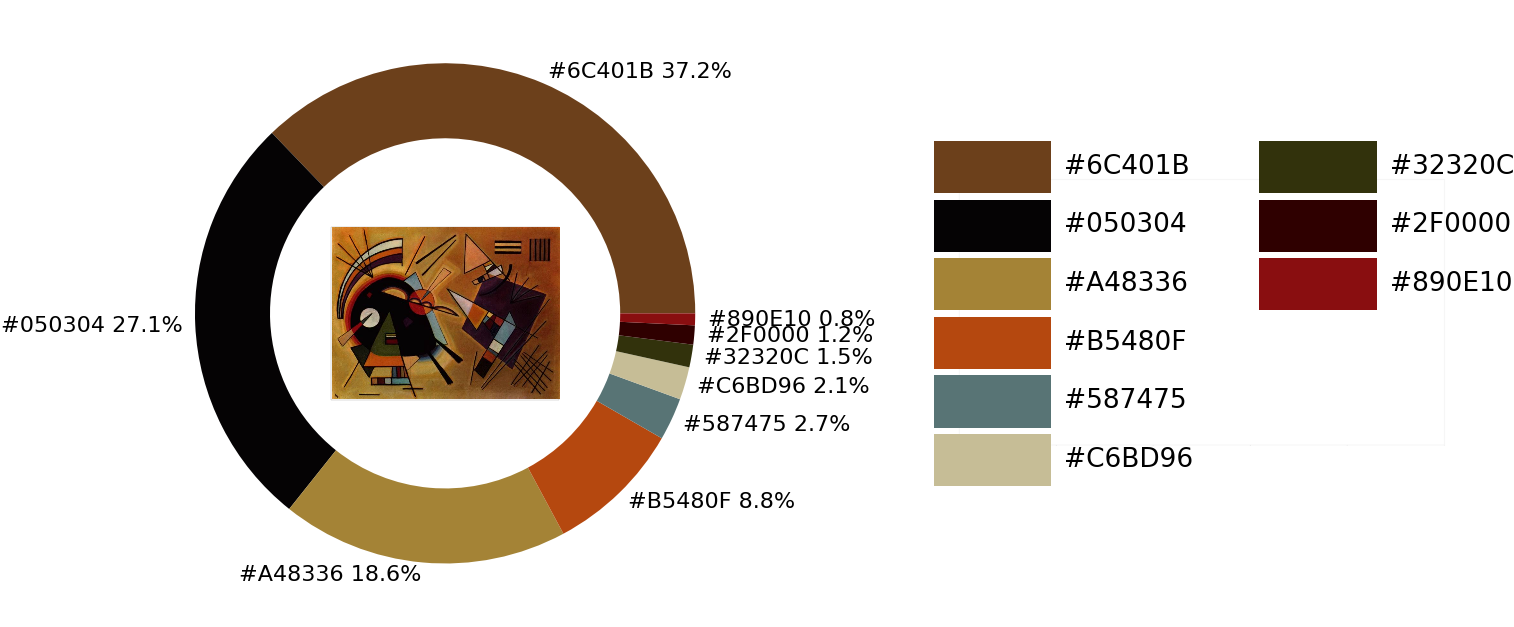

In [10]:
img = mpimg.imread('../images/WikiArt/Abstract-Art/57726e81edc2cb3880b74f34.jpg')
bg = plt.imread('bg.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)

#donut plot
wedges, text = ax1.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 160, 'color':'black'})
plt.setp(wedges, width=0.3)

#add image in the center of donut plot
imagebox = OffsetImage(img, zoom=2.3)
ab = AnnotationBbox(imagebox, (0, 0))
ax1.add_artist(ab)

#color palette
x_posi, y_posi, y_posi2 = 160, -170, -170
for c in list_color:
    if list_color.index(c) <= 5:
        y_posi += 180
        rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
        ax2.add_patch(rect)
        ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
    else:
        y_posi2 += 180
        rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
        ax2.add_artist(rect)
        ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

ax2.axis('off')
fig.set_facecolor('white')
plt.imshow(bg)       
plt.tight_layout()

# All together

In [11]:
def exact_color(input_image, resize, tolerance, zoom):
    #background
    bg = 'bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)
    
    #resize
    output_width = resize
    img = Image.open(input_image)
    if img.size[0] >= resize:
        wpercent = (output_width/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((output_width,hsize), Image.ANTIALIAS)
        resize_name = 'resize_'+ input_image
        img.save(resize_name)
    else:
        resize_name = input_image
    
    #crate dataframe
    img_url = resize_name
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 10)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(resize_name)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    return plt.show()

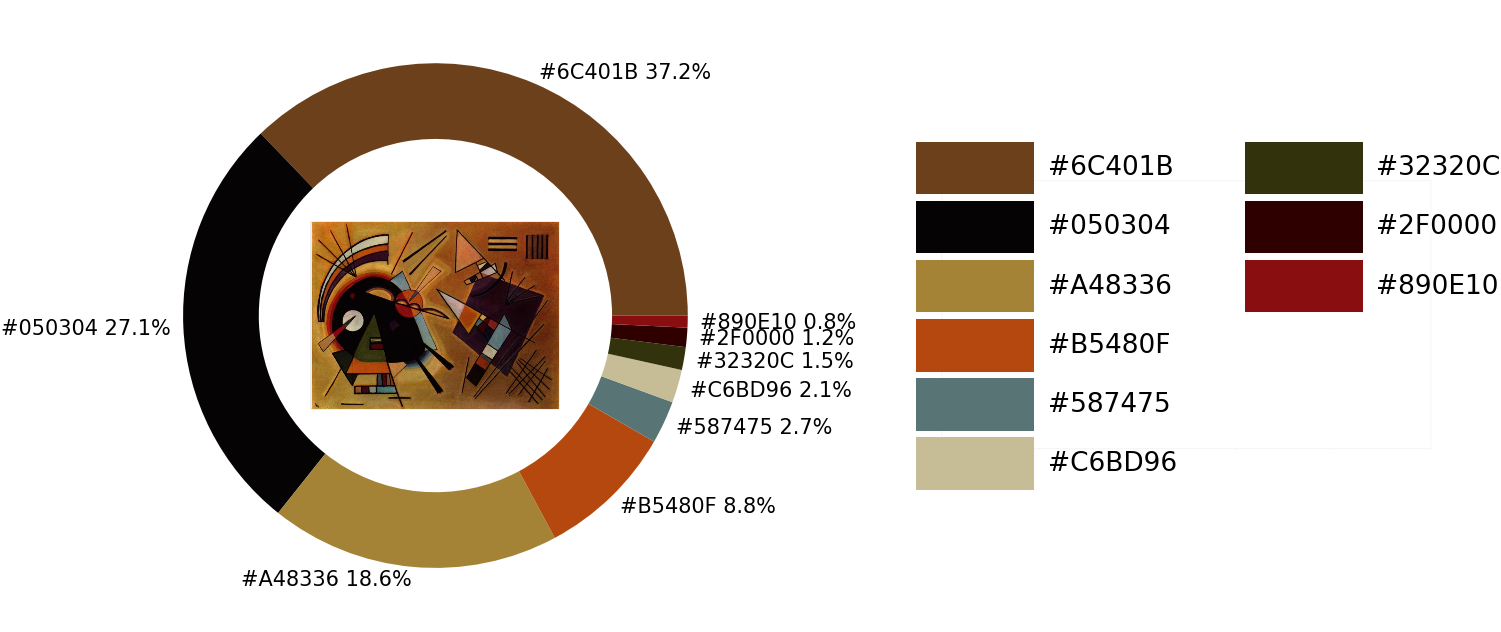

In [12]:
exact_color('../images/WikiArt/Abstract-Art/57726e81edc2cb3880b74f34.jpg', 900, 24, 2.5)

# Test

In [112]:
def extract_colors_from_folder(folder_path, tolerance=24, limit=10):
    color_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            colors = extcolors.extract_from_path(image_path, tolerance=tolerance, limit=limit)
            color_data.extend(colors)
    
    return color_data

In [113]:
movement = "Abstract-Expressionism"

In [114]:
folder_path = f"../images/WikiArt/{movement}"
colors_data = extract_colors_from_folder(folder_path)

In [115]:
filtered = [i for i in colors_data if type(i) != int]
#filtered

In [116]:
#colors_data

In [117]:
len(colors_data)

392

In [118]:
len(filtered)

196

In [119]:
filtered[0][0][0]

(42, 40, 41)

In [120]:
def color_to_df(input_, movement):
    df_data = []

    for color_info in input_:
        for i in color_info:
            colores = {}

            rgb = i[0]
            percent = color_info[1]
            hex_code = rgb2hex(rgb[0], rgb[1], rgb[2])

            colores["hex_code"] = hex_code
            colores["R"] = percent[0][0]
            colores["G"] = percent[0][1]
            colores["B"] = percent[0][2]
            colores["percent"] = percent[1]
            colores["Movement"] = movement

            df_data.append(colores)

    df = pd.DataFrame(df_data)
    df = df.nlargest(10, "percent")

    return df


In [121]:
df_color = color_to_df(filtered, movement)
df_color.hex_code

953     #F7F7F7
954     #0A0605
955     #3E3E40
956     #78787A
1572    #CFC1B4
1573    #717171
1574    #1F2022
1575    #574807
1576    #310252
1577    #002600
Name: hex_code, dtype: object

In [122]:
df_color.percent.max()

793347

/var/folders/d2/c8nbsrk920lgrdq2nn0mv1t00000gn/T/ipykernel_48283/3148596068.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


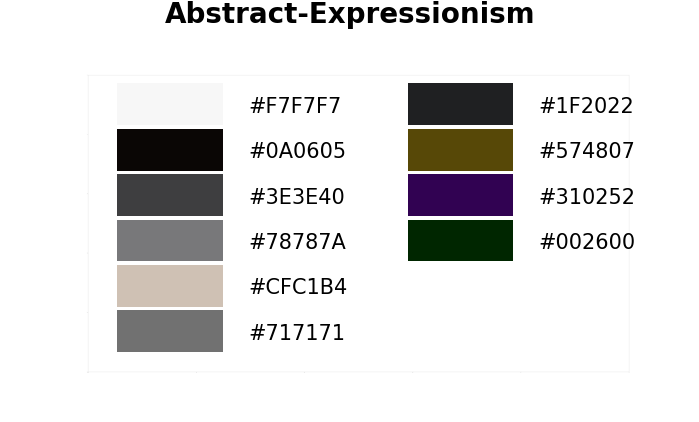

In [123]:
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi=10)
ax = fig.add_subplot(1, 1, 1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for color in df_color['hex_code'].tolist():
    if df_color['hex_code'].tolist().index(color) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor=color)
        ax.add_patch(rect)
        ax.text(x=x_posi + 360, y=y_posi + 80, s=color, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor=color)
        ax.add_artist(rect)
        ax.text(x=x_posi + 1160, y=y_posi2 + 80, s=color, fontdict={'fontsize': 150})

plt.title(movement, fontsize=200, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.imshow(bg)

In [124]:
df_color.to_csv(f"../data/palettes/Movement/{movement}_palette.csv")

In [125]:
#plt.savefig(f"../images/palettes/Movement/palette_{movement}.png", dpi=300)

# Save

In [126]:
!ls ../images/palettes/Movement

palette_1.png                      palette_Abstract-Expressionism.png
palette_Abstract-Art.png


/var/folders/d2/c8nbsrk920lgrdq2nn0mv1t00000gn/T/ipykernel_48283/3148596068.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


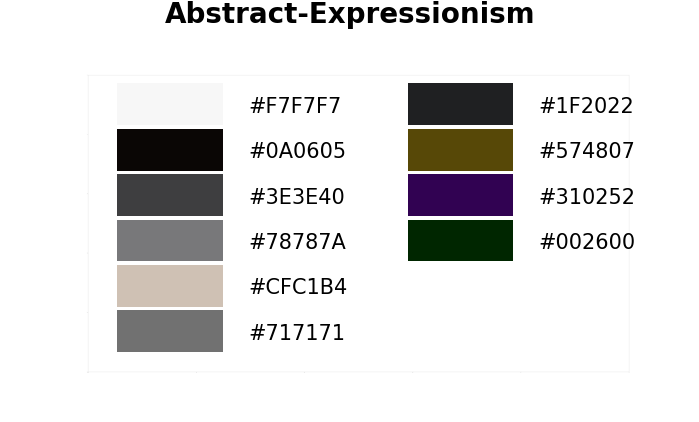

In [127]:
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi=10)
ax = fig.add_subplot(1, 1, 1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for color in df_color['hex_code'].tolist():
    if df_color['hex_code'].tolist().index(color) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor=color)
        ax.add_patch(rect)
        ax.text(x=x_posi + 360, y=y_posi + 80, s=color, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor=color)
        ax.add_artist(rect)
        ax.text(x=x_posi + 1160, y=y_posi2 + 80, s=color, fontdict={'fontsize': 150})

plt.title(movement, fontsize=200, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.imshow(bg)

/var/folders/d2/c8nbsrk920lgrdq2nn0mv1t00000gn/T/ipykernel_48283/1295333298.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


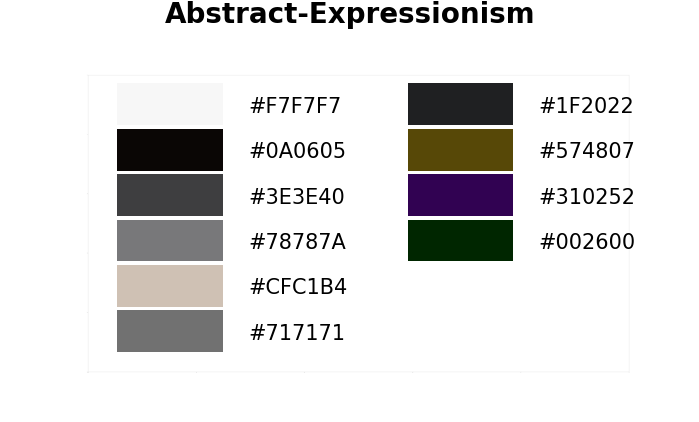

In [128]:
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi=10)
ax = fig.add_subplot(1, 1, 1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for color in df_color['hex_code'].tolist():
    if df_color['hex_code'].tolist().index(color) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor=color)
        ax.add_patch(rect)
        ax.text(x=x_posi + 360, y=y_posi + 80, s=color, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor=color)
        ax.add_artist(rect)
        ax.text(x=x_posi + 1160, y=y_posi2 + 80, s=color, fontdict={'fontsize': 150})

plt.title(movement, fontsize=200, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.imshow(bg)

#plt.savefig(f"../images/palettes/Movement/palette_{movement}.png", dpi=300)
plt.show()


